In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./files/df_format.csv")
df.head(2)

,data_pesquisa,id_empresa,rede,endereco_completo,codigo_categoria,id_produto,descricao,preco_regular,preco_atacado,preco_atacado_qtd,preco_promocao,preco_fidelidade,bairro,categoria
0,2025-07-31,17.0,Agricer,"Rua Izaac Ferreira da Cruz, 1440 - Pinheirinho...",5.0,2048,BACON SUÍNO -FRIGONOVAK -1 KG,34.99,0.0,0,0.0,0.0,Sítio Cercado,Açougue
1,2025-07-31,17.0,Agricer,"Rua Izaac Ferreira da Cruz, 1440 - Pinheirinho...",5.0,2055,LINGUIÇA CALABRESA -FRIGONOVAK -1 KG,34.99,0.0,0,0.0,0.0,Sítio Cercado,Açougue


informações do dataframe para analise do tipo de dados

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13592 entries, 0 to 13591
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   data_pesquisa      13592 non-null  object 
 1   id_empresa         12240 non-null  float64
 2   rede               13592 non-null  object 
 3   endereco_completo  13592 non-null  object 
 4   codigo_categoria   13296 non-null  float64
 5   id_produto         13592 non-null  int64  
 6   descricao          13592 non-null  object 
 7   preco_regular      13592 non-null  float64
 8   preco_atacado      13592 non-null  float64
 9   preco_atacado_qtd  13592 non-null  int64  
 10  preco_promocao     13592 non-null  float64
 11  preco_fidelidade   13592 non-null  float64
 12  bairro             13592 non-null  object 
 13  categoria          13296 non-null  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 1.5+ MB


porcentagem de linhas nulas das colunas

In [3]:
def porcentagem_nulos(value):
    return f"{100 * value:.2f}%"
(df.isna().sum() / len(df)).sort_values(ascending=False).apply(porcentagem_nulos)

id_empresa           9.95%
codigo_categoria     2.18%
categoria            2.18%
data_pesquisa        0.00%
endereco_completo    0.00%
rede                 0.00%
id_produto           0.00%
descricao            0.00%
preco_atacado        0.00%
preco_regular        0.00%
preco_atacado_qtd    0.00%
preco_promocao       0.00%
preco_fidelidade     0.00%
bairro               0.00%
dtype: object

In [4]:
filtro_zero = df[df["preco_regular"] == 0][["descricao", "preco_regular"]]
display(filtro_zero)

,descricao,preco_regular
14,CARNE BOVINA ALCATRA COM MAMINHA S/ OSSO -( + ...,0.0
17,CARNE BOVINA COSTELA PONTA -( + ) BARATO -1 KG,0.0
27,CARNE BOVINA POSTA VERMELHA S/ OSSO (PEDAÇO) -...,0.0
30,COXINHAS DA ASA CONGELADA -( + ) BARATO -1 KG,0.0
36,ABACAXI PEROLA -1 UN,0.0
...,...,...
13214,DOCE DE FRUTAS -RITTER -400 GR,0.0
13543,LIMPADOR DESENGORDURANTE COZINHA -GIOCA -500 ML,0.0
13550,LIMPADOR PERFUMADO -( + ) BARATO -500 ML,0.0
13553,GELATINA EM PÓ -( + ) BARATO -20 GR,0.0


Quais mercados oferecem os preços mais baixos em geral?

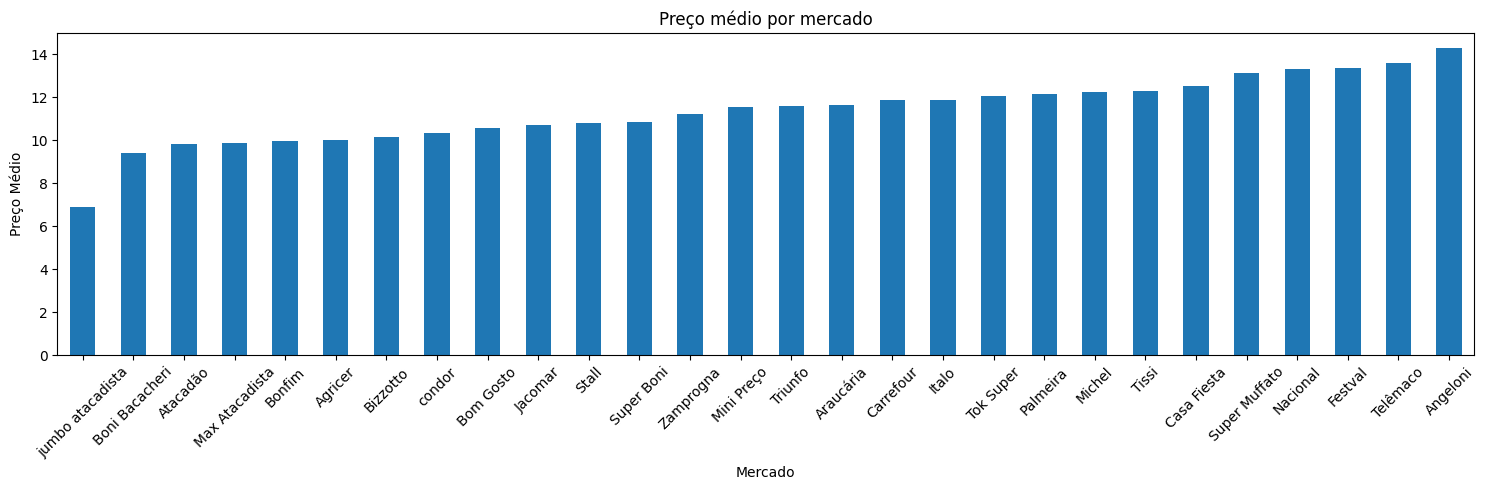

In [5]:
precos_por_mercado = df.groupby("rede")["preco_regular"].mean().sort_values()
plt.figure(figsize=(15, 5))
precos_por_mercado.plot(kind='bar')
plt.ylabel('Preço Médio')
plt.xlabel('Mercado')
plt.title('Preço médio por mercado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existe uma diferença significativa de preços entre mercados de diferentes regiões da cidade?

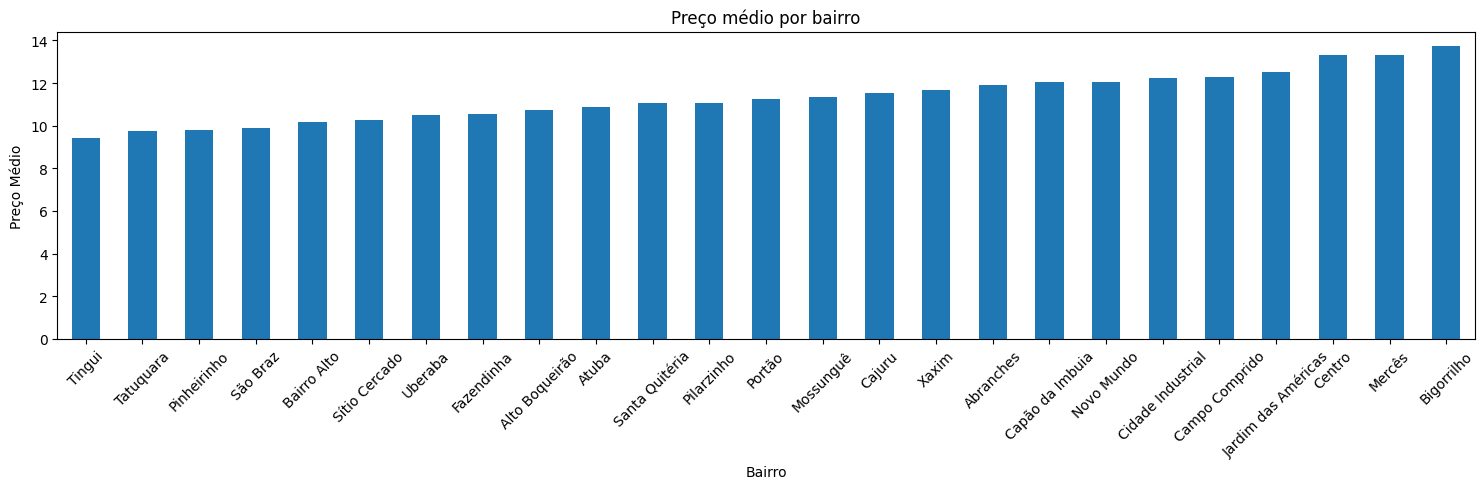

In [6]:
preco_bairro = df.groupby("bairro")["preco_regular"].mean().sort_values()
plt.figure(figsize=(15,5))
preco_bairro.plot(kind='bar')
plt.ylabel('Preço Médio')
plt.xlabel('Bairro')
plt.title('Preço médio por bairro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Quais produtos têm maior variação de preço entre os mercados? (usando desvio padrao e calculando todos os mercados)

In [7]:
variacao_produtos = df.groupby("descricao")["preco_regular"].std().sort_values(ascending=False)

display(variacao_produtos.head(10))

descricao
CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO -1 KG            24.639033
CARNE BOVINA PICANHA -( + ) BARATO -1 KG                        23.038708
CARNE BOVINA ALCATRA COM MAMINHA S/ OSSO -( + ) BARATO -1 KG    21.837613
ALMONDEGA BOVINA CONGELADA -( + ) BARATO -1 KG                  16.315564
CARNE BOVINA FRALDINHA S/ OSSO -( + ) BARATO -1 KG              16.234570
CARNE BOVINA PATINHO S/ OSSO ( PEDAÇO ) -( + ) BARATO -1 KG     15.169542
CARNE BOVINA CONTRA FILE C/ OSSO -( + ) BARATO -1 KG            14.768881
CARNE BOVINA ALCATRA S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG       14.342667
KIWI NACIONAL -1 KG                                             14.153963
CARNE BOVINA COXÃO MOLE S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG    13.844100
Name: preco_regular, dtype: float64

Quais produtos têm maior variação de preço entre os mercados? (usando a coluna preço e calculando todos os mercados)

In [8]:
intervalo_produtos = (df.groupby("descricao")["preco_regular"].max() - df.groupby("descricao")["preco_regular"].min()).sort_values(ascending=False)

display(intervalo_produtos.head(10))

descricao
CARNE BOVINA PICANHA -( + ) BARATO -1 KG                            118.90
CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO -1 KG                 95.25
CARNE BOVINA COXÃO MOLE S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG         72.98
CARNE BOVINA PATINHO S/ OSSO ( PEDAÇO ) -( + ) BARATO -1 KG          69.99
CARNE BOVINA CONTRA FILE C/ OSSO -( + ) BARATO -1 KG                 68.90
CARNE BOVINA CONTRA FILE S/ OSSO -( + ) BARATO -1 KG                 65.99
BACON -( + ) BARATO -1 KG                                            64.99
CARNE BOVINA ALCATRA S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG            64.90
CARNE BOVINA FRALDINHA S/ OSSO -( + ) BARATO -1 KG                   59.98
CARNE BOVINA POSTA VERMELHA S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG     59.98
Name: preco_regular, dtype: float64

visualização dos preços da coluna "preco_regular" em ordem do maior para o menor para uma breve analise

In [9]:
df[df["descricao"].str.contains("CARNE BOVINA", case=False, na=False)][["descricao", "preco_regular", "rede"]].sort_values("preco_regular", ascending=False).head(10)

,descricao,preco_regular,rede
11217,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,118.90,Angeloni
10365,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,109.98,Festval
3071,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,97.50,Palmeira
12601,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,95.25,Zamprogna
4737,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,95.09,Nacional
6122,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,89.99,condor
3799,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,89.90,Italo
8131,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,87.90,Tok Super
5291,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,85.99,Festval
11212,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,85.99,Angeloni


Quais categorias de produtos (ex.: alimentos, bebidas, higiene) têm maior variação de preço?

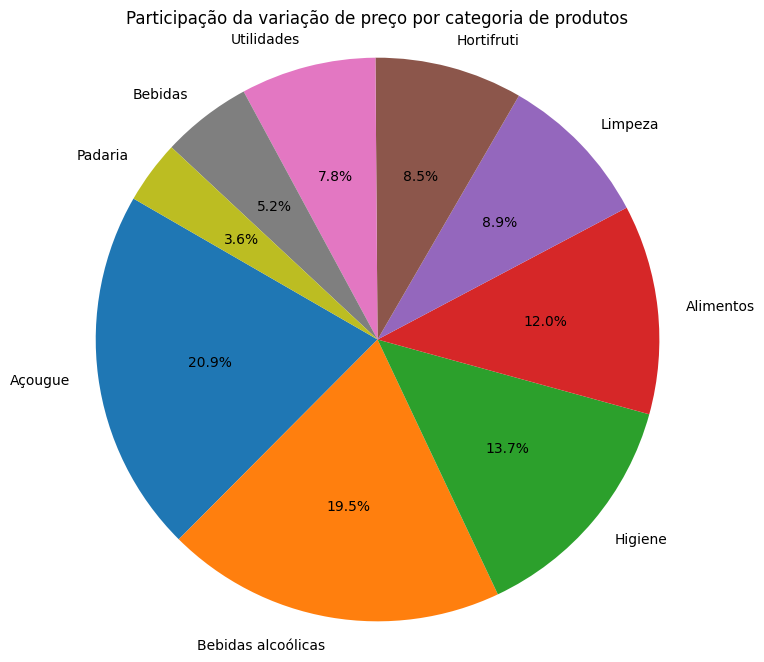

In [10]:
variacao_categoria = df.groupby("categoria")["preco_regular"].std().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(
    variacao_categoria,
    labels=variacao_categoria.index,
    autopct='%1.1f%%',
    startangle=150
)
plt.title('Participação da variação de preço por categoria de produtos')
plt.axis('equal')
plt.show()

Existe uma relação entre o tipo de produto e a frequência de promoções?

In [11]:
freq_promocao = df.groupby("categoria")["preco_promocao"].apply(lambda x: (x > 0).mean() * 100).sort_values(ascending=False)
freq_promocao = freq_promocao.apply(lambda x: f"{x:.2f}%")
display(freq_promocao)

categoria
Hortifruti            9.81%
Açougue               3.92%
Utilidades            2.69%
Higiene               2.33%
Limpeza               1.71%
Alimentos             1.45%
Bebidas               0.70%
Bebidas alcoólicas    0.47%
Padaria               0.00%
Name: preco_promocao, dtype: object

Quais produtos são consistentemente mais caros e mais baratos?

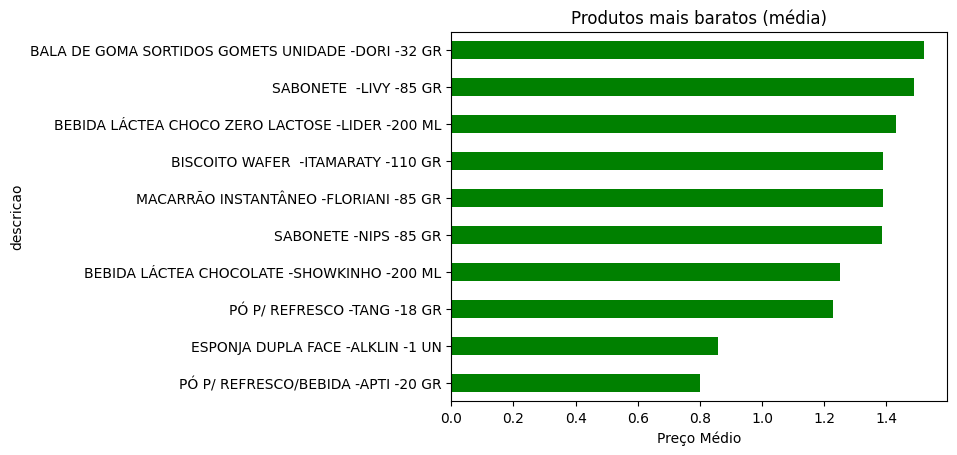

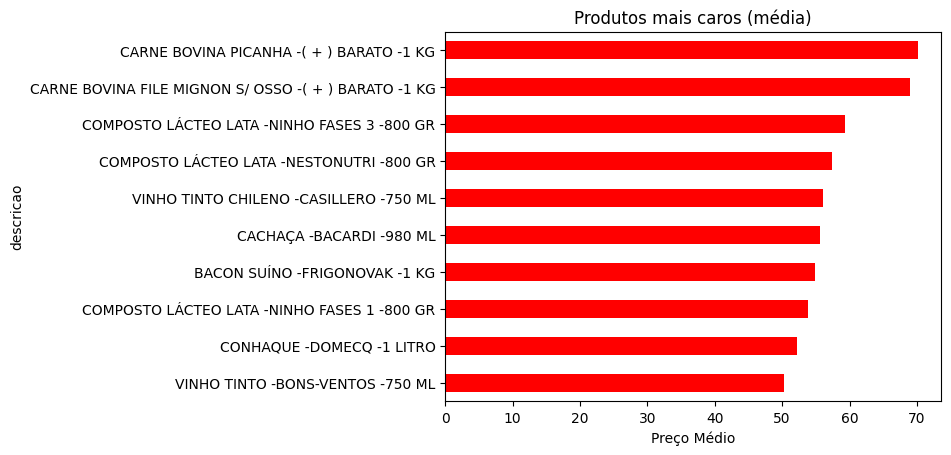

In [12]:
media_precos = df.groupby("descricao")["preco_regular"].mean().sort_values()

produtos_mais_baratos = media_precos.head(10)
produtos_mais_caros = media_precos.tail(10)

produtos_mais_baratos.plot(kind='barh', color='green')
plt.xlabel('Preço Médio')
plt.title('Produtos mais baratos (média)')
plt.show()

produtos_mais_caros.plot(kind='barh', color='red')
plt.xlabel('Preço Médio')
plt.title('Produtos mais caros (média)')
plt.show()

Existe uma correlação entre a localização do mercado e o preço médio dos produtos?

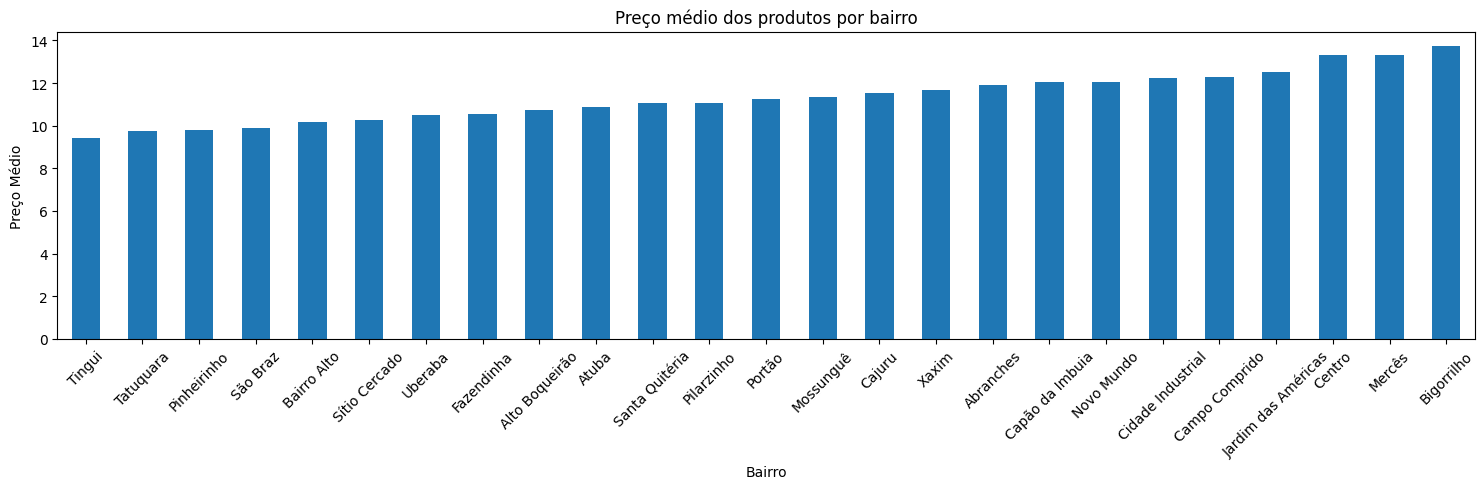

In [13]:
preco_bairro = df.groupby("bairro")["preco_regular"].mean().sort_values()
plt.figure(figsize=(15, 5))
preco_bairro.plot(kind='bar')
plt.ylabel('Preço Médio')
plt.xlabel('Bairro')
plt.title('Preço médio dos produtos por bairro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Qual é o custo médio de uma cesta básica em diferentes mercados?

rede
Telêmaco            3.99
Triunfo            29.97
Tissi              43.83
Festval            46.23
Palmeira           55.00
Zamprogna          67.63
Araucária          67.83
Atacadão           68.34
condor             68.38
Agricer            69.99
Stall              75.01
Super Muffato      75.23
Nacional           76.43
Michel             78.32
Italo              79.75
Tok Super          80.22
Angeloni           80.67
Mini Preço         80.94
Max Atacadista     89.79
Super Boni         90.24
Jacomar            92.70
Carrefour         117.73
Name: preco_regular, dtype: float64

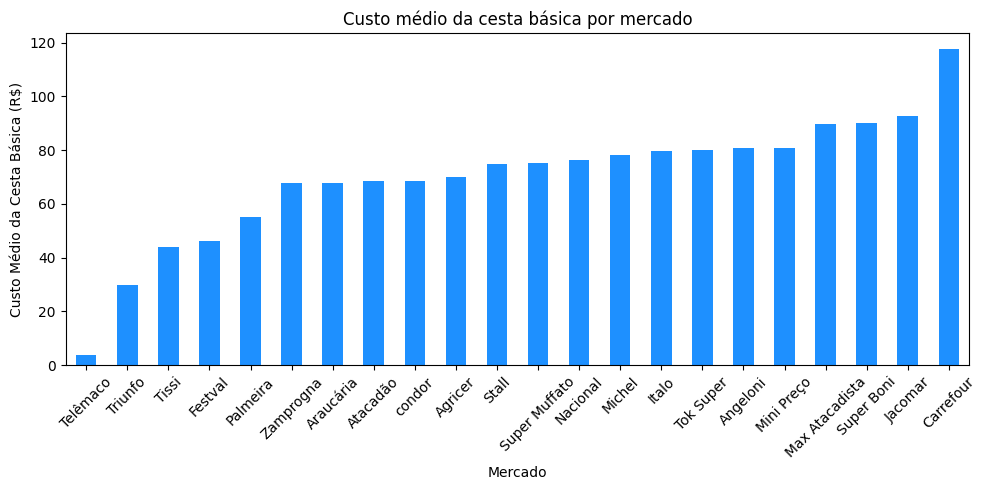

In [27]:
cesta_basica = [
    "ARROZ POLIDO  -SABOR SUL -5 KG",
    "FEIJÃO CARIOCA -( + ) BARATO -1 KG",
    "ÓLEO DE SOJA  -COAMO -900 ML",
    "AÇÚCAR REFINADO  -ALTO ALEGRE -1 KG",
    "CAFÉ A VÁCUO EXTRA FORTE -ALVORADA -500 GR",
    "MACARRÃO C/ OVOS PENA -RENATA -500 GR",
    "FARINHA DE TRIGO  -ANACONDA -5 KG",
    "LEITE LONGA VIDA INTEGRAL  -TIROL -1 LITRO"
]

df_cesta = df[df["descricao"].isin(cesta_basica)]

df_cesta_unicos = df_cesta.sort_values("preco_regular").drop_duplicates(subset=["rede", "descricao"], keep="first")

custo_cesta_mercado = df_cesta_unicos.groupby("rede")["preco_regular"].sum().sort_values()

display(custo_cesta_mercado)

plt.figure(figsize=(10, 5))
custo_cesta_mercado.plot(kind='bar', color='dodgerblue')
plt.ylabel('Custo Médio da Cesta Básica (R$)')
plt.xlabel('Mercado')
plt.title('Custo médio da cesta básica por mercado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df_cafe_3redes = df_cesta_3redes[df_cesta_3redes["descricao"].str.contains("ÓLEO", case=False, na=False)]
display(df_cafe_3redes[["descricao", "rede", "preco_regular"]].drop_duplicates(subset=["descricao", "rede"]))

,descricao,rede,preco_regular
683,ÓLEO DE SOJA -COAMO -900 ML,condor,6.78
5664,ÓLEO DE SOJA -COAMO -900 ML,Festval,6.99
11592,ÓLEO DE SOJA -COAMO -900 ML,Angeloni,8.96
